# Forest Fire Spreading 


## Background

Wildfires are one of the most harmful phenomena in Chile burning thousands of forest hectares every year destroying significant flora and fauna, and affecting the air, water cycles, and the ecosystem. Wildfires start by varied reasons, ranging from reckless human behavior to extreme weather and environmental conditions

## Main Goal

Build a mathematical model based on SPDE qualitatively realistic with the phenomenon behaviour. 

## Objectives
1. Start with an agent based model, working with the weather conditions and initial fires focus. 
2. Get a continuous model based on SPDE from the ABM.
3. Assess wind relevance to the model.

In [1]:
import firemodels.cellularautomata as ca
import firemodels.cellularautomatalayers as cal
import firemodels.temperature as temp
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

## Cellular Automata

In [ ]:
def fireFocus(M, N, i, j, size):
    focus = np.zeros((M, N))
    focus[i-size:i+size, j-size:j+size] = np.ones((2*size, 2*size)) 
    return focus

In [ ]:
def plotStates(t=0):
    play = widgets.Play(
        value=0,
        min=0,
        max=len(states)-1,
        step=1,
        description="Press play",
        disabled=False
    )
    slider = widgets.IntSlider()
    widgets.jslink((play, 'value'), (slider, 'value'))
    widgets.HBox([play, slider])
    widgets.interact(automata.plotStates, t=play)

In [ ]:
# Testing
M = 101
N = 101
initial = fireFocus(M, N, 50, 50, 2)
rule = .35
#neighborhood = 'vonneumann'
neighborhood = 'moore'
times = 100

In [ ]:
automata = ca.new(M, N, initial, rule, neighborhood)
states = automata.propagate(times)

In [ ]:
plotStates()

# Cellular Automata with layers

In [ ]:
temperature = np.load('data/temperature100x100.npy')
wind_speed = np.load('data/wind_speed100x100.npy')
humidity = np.load('data/humidity100x100.npy')
pressure = np.load('data/pressure100x100.npy')

In [ ]:
temperature = temperature / np.max(temperature)
wind_speed = wind_speed / np.max(wind_speed)
humidity = humidity / np.max(humidity)
pressure = pressure / np.max(pressure)

In [ ]:
# Testing
(M, N) = temperature.shape
wd = np.ones_like(temperature)*0
world = [temperature, wind_speed, wd, humidity, pressure]
initial = fireFocus(M, N, 50, 50, 2)
#neighborhood = 'vonneumann'
neighborhood = 'moore'
alpha = .5
beta = 1-alpha
times = 200
rule = .3

In [ ]:
automata = cal.new(initial, world, neighborhood, rule, alpha, beta)
states = automata.propagate(times)

In [ ]:
plotStates()

* $BT$: Burning trees
* $T$: Temperature

<!--
\begin{equation}
    BT_{t+1} = BT_{t} + F(BT_t, T_t, W_t, T_t, P_T)
\end{equation}
\begin{equation}
    T_{t+1} = F_t +  G(BT_t, T_t, W_t, T_t, P_T)
\end{equation}
\begin{equation}
    W_{t+1} = W_t +  I( W_t)
\end{equation}
-->

## Temperature

### Discrete

\begin{equation}
    \begin{split}
        T_{i,j}^{k+1} & = T_{i,j}^k - \frac45 T_{i,j}^k 
            + \frac15\left(T_{i-1,j}^k+T_{i+1,j}^k+T_{i,j-1}^k+T_{i,j+1}^k\right) \\
            & = \frac15\left(T_{i-1,j}^k+T_{i+1,j}^k+T_{i,j}^k+T_{i,j-1}^k+T_{i,j+1}^k\right)
    \end{split}
\end{equation}

In [2]:
def temperatureFocus(M, N):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, M)
    X, Y = np.meshgrid(x, y)
    return 1e3*np.exp(-1000*((X-.5)**2 + (Y-.5)**2))

In [3]:
M, N = 100, 100
initial = temperatureFocus(M, N)
times = 100
c = 1/5

In [4]:
dte = temp.discrete(c, initial, times)
dtemps = dte.propagate()

In [5]:
widgets.interact(dte.plotTemperatures, t=widgets.IntSlider(min=0, max=len(dtemps)-1, continuous_update=False),
                 temperatures=widgets.fixed(dtemps))

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=99), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

#### With Forest

In [60]:
def temperatureFocus(M, N):
    temperature = np.zeros((M,N))
    A = np.zeros((M,N))
    A[M//2, N//2] = 1
    A[M//2+1, N//2] = 1
    temperature = temperature + A * 600
    return temperature, A

In [106]:
def temperatureFocus2(M, N):
    # Initial trees burning
    tree = np.zeros((M,N))
    tree[M//2, N//2] = 1
    tree[M//2+1, N//2] = 1
    # Initial temperature
    #x = np.linspace(0, 1, N)
    #y = np.linspace(0, 1, M)
    #X, Y = np.meshgrid(x, y)
    #temperatures = 1e3*np.exp(-1000*((X-.5)**2 + (Y-.5)**2))
    temperature = np.zeros((M,N))
    temperature = temperature + A * 600
    fuel = np.zeros((M,N))
    radius = 10
    cx, cy = M//2, N//2 # The center of circle
    y, x = np.ogrid[-radius: radius, -radius: radius]
    index = x**2 + y**2 <= radius**2
    fuel[cy-radius:cy+radius, cx-radius:cx+radius][index] = 1
    return temperature, tree, fuel

In [107]:
M, N = 100, 100
#initial, A = temperatureFocus(M, N)
T0, A0, Y0 = temperatureFocus2(M, N)
times = 300
c = 1/5
b = 8000
maxTemp = 1000

In [108]:
dt2 = temp.discrete(c, T0, times, A0, b, maxTemp)

In [109]:
widgets.interact(dt2.plotTemperatures, t=widgets.IntSlider(min=0, max=len(dt2a_temps)-1, 
    continuous_update=False), temperatures=widgets.fixed(dt2a_temps))

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=299), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

#### Stochastic

\begin{equation}
    T_{i,j}^{k+1} = T_{i,j}^{k} - 4 \, c \, T_{i,j}^{k} + (c + \sigma_1 \Delta  \, Z^k_{i,j}) \left(T_{i+1,j}^{k} + T_{i-1,j}^{k} + T_{i,j+1}^{k} + T_{i,j-1}^{k}\right) + \sigma_2 \Delta W^k_{i,j}
\end{equation}

#### Approach 1 $\sigma_1=0$

In [84]:
dt2b_temps, dt2b_A, _ = dt2.propagate(None, 10)

In [85]:
widgets.interact(dt2.plotTemperatures, t=widgets.IntSlider(min=0, max=len(dt2b_temps)-1, 
    continuous_update=False), temperatures=widgets.fixed(dt2b_temps))

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=299), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

#### Approach 2 $\sigma_1, \sigma_2 \neq 0$

In [86]:
dt2c_temps, dt2c_A, _ = dt2.propagate(1/6, 10)

In [87]:
widgets.interact(dt2.plotTemperatures, t=widgets.IntSlider(min=0, max=len(dt2c_temps)-1, 
    continuous_update=False), temperatures=widgets.fixed(dt2c_temps))

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=299), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

#### Fuel added

\begin{equation}
    \begin{split}
        T_{i,j}^{k+1} & = T_{i,j}^{k} - 4 \, c \, T_{i,j}^{k} + (c + \sigma_1 \Delta  \, Z^k_{i,j}) \left(T_{i+1,j}^{k} + T_{i-1,j}^{k} + T_{i,j+1}^{k} + T_{i,j-1}^{k}\right) + \sigma_2 \Delta W^k_{i,j} + A^k_{i,j} \, H \,Y_{i,j}^k \, Z  \exp(E/T^k_{i,j}) \\
        Y^{k+1}_{i,j} & = Y^k_{i,j} + \,Y_{i,j}^k \, Z  \exp(E/T^k_{i,j})
    \end{split}
\end{equation}

#### With Forest and Fuel $\sigma_1=\sigma_2=0$

In [92]:
Ea = 1
Z = .1
H = 5500
b = 8
maxTemp = 1000
dt3 = temp.discrete(c, T0, times, Y0, b, maxTemp, Ea, Z, H)
dt3a_temps, _, dt3a_fuel = dt3.propagate()#4/30, 20)

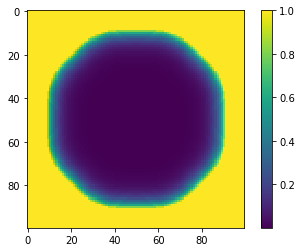

In [100]:
plt.imshow(dt3a_fuel[100])
plt.colorbar()
plt.show()

In [95]:
widgets.interact(dt3.plotSimulation, t=widgets.IntSlider(min=0, max=len(dt3a_temps)-1, 
    continuous_update=False), temperatures=widgets.fixed(dt3a_temps), fuel=widgets.fixed(dt3a_fuel))

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=299), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

#### With Forest and Fuel Stochastic  $\sigma_1, \sigma_2 \neq 0$

In [26]:
dt3 = temp.discrete(c, initial, times, A, b, maxTemp, Ea*1e-5, Z, H)
dt3b_temps, _, dt3b_fuel = dt3.propagate(4/28, 28)

In [27]:
widgets.interact(dt3.plotSimulation, t=widgets.IntSlider(min=0, max=len(dt3b_temps)-1, 
    continuous_update=False), temperatures=widgets.fixed(dt3b_temps), fuel=widgets.fixed(dt3b_fuel))

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=299), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

### Continuous

\begin{equation}
    \partial T(i,j,k)= (c' \, \partial t + \sigma_1' \, \partial Z_{i,j}(t))\, \Delta T(i,j,k) + \sigma_2' \,\partial W_{i,j}(t)
\end{equation}

#### With $\sigma_1=\sigma_2=0$

In [28]:
def temperatureCFocus(M, N):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, M)
    X, Y = np.meshgrid(x, y)
    return 1e3*np.exp(-1000*((X-.5)**2 + (Y-.5)**2))

In [30]:
M, N = 50, 50  

initial, A = temperatureFocus(M, N)

# Parameters
mu = 1/5 
T = 1000
dt = 1e-4
b = 8
maxTemp = 1000

In [31]:
ct = temp.continuous(initial, mu, dt, T, b, maxTemp, A=A)
cta, Aa, Wa = ct.solvePDE()

In [32]:
widgets.interact(ct.plotTemperatures, t=widgets.IntSlider(min=0, max=len(cta)-1), 
                 temperatures=widgets.fixed(cta))

interactive(children=(IntSlider(value=0, description='t', max=1000), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

#### Approach 1 $\sigma_1\neq 0$

In [33]:
ctb, Ab, Wb = ct.solvePDE(1/3)

In [34]:
widgets.interact(ct.plotTemperatures, t=widgets.IntSlider(min=0, max=len(ctb)-1), 
                 temperatures=widgets.fixed(ctb))

interactive(children=(IntSlider(value=0, description='t', max=1000), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

#### Approach 1 $\sigma_1,\sigma_2\neq 0$

In [35]:
ctc, Ac, Wc = ct.solvePDE(1/8, 2000)

In [36]:
widgets.interact(ct.plotTemperatures, t=widgets.IntSlider(min=0, max=len(ctc)-1), 
                 temperatures=widgets.fixed(ctc))

interactive(children=(IntSlider(value=0, description='t', max=1000), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>